### The code is implemented and run on Google Colab

In [ ]:
# If use Google Colab, use the two commands to install torch and torchvision
!pip install torch
!pip install torchvision

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Compose
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
train_dataset = datasets.CIFAR10(root='data/', download=True, train=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root='data/', download=True, train=False, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [ ]:
# load train and test data
X_train = train_dataset.data/255
y_train = np.array(train_dataset.targets)
X_test = test_dataset.data/255
y_test = np.array(test_dataset.targets)

In [ ]:
# vectorize train and test data
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))

### Implementatation of Knn

In [ ]:
#calculate l2 distance 
def calculate_l2 (p1, p2):
    dist = np.linalg.norm((p1-p2))
    return dist

#find all neighbors of test data from train data using l2 distance
def predict(train, test, train_labels,k):
    neighbors = []
    list_distances = []

    for i in train:
      #using given metrics to calculate distance and append its corresponding label to a list
      l2 = calculate_l2(i,test)
      list_distances.append(l2)
    
    #find k smallest value
    idx = np.argpartition(list_distances, k)
    idx = idx[:k]
    #find their labels 
    for i in idx:
        neighbors.append(train_labels[i])

    #find the most fequent label
    values, counts = np.unique(neighbors, return_counts = True)
    max_count = max(counts)
    counts = counts.tolist()
    max_index = counts.index(max_count)
    predicted_val = values[max_index]

    return predicted_val

# give predicted labels and true labels, find all differences
# calculate accruacy: #corrects/#total
def calculate_accuracy (predict_labels, true_labels):
    corrects = np.nonzero(predict_labels == true_labels)[0]
    accuracy = len(corrects)/len(true_labels)
    return accuracy

## calculate accuracy for different parameters in 5 fold cross validation

Note: running each k value need approximately 2 hours and there are 4 k values. Running all 4 k values with cross-validation will take very long time and Google Colab may restart session after running couple of hours.

In [ ]:
total_acc = []

# list of parameters
k_li = [3,5,7,11]

for k in k_li:
  acc_array = []
  # 5 fold cross-validation
  # split train,test dataset into 5 folds and iterate
  m = np.split(X_train,5)
  n = np.split(y_train,5)
  for index in range(5):
    #use index to split validations set and rest of train set
    if index == 0:
      trainset_x = np.concatenate(m[index+1:],axis=0)
      trainset_y  = np.concatenate(n[index+1:],axis=0)
    else:
      trainset_x =  np.concatenate(m[0:index]+m[index+1:],axis=0)
      trainset_y  = np.concatenate(n[0:index]+n[index+1:],axis=0)
    validation_x = m[index]
    validation_y = n[index]

    predicted_labels = []
    for i in X_test:
      #predict using knn
      res = predict(validation_x, i, validation_y, k)
      #get predictions and append to a list
      predicted_labels.append(res)
    acc = calculate_accuracy(predicted_labels, y_test)
    acc_array.append(acc)
  total_acc.append(sum(acc_array)/len(acc_array))
  print("Average accuracy for k =",k,":", sum(acc_array)/len(acc_array)*100,"%")

Average accuracy for k = 3 : 28.108000000000004 %
Average accuracy for k = 5 : 29.325999999999997 %
Average accuracy for k = 7 : 29.402 %
Average accuracy for k = 11 : 29.843999999999998 %


## Draw a line graph with parameters as x-axis and accuracy as y-axis

Text(0.5, 1.0, 'Accuacy with different parameters')

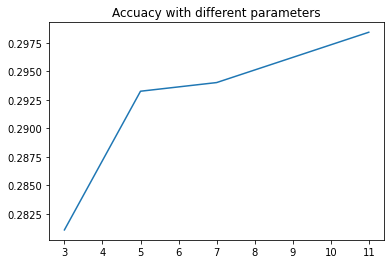

In [ ]:
plt.plot(k_li, total_acc)
plt.title('Accuacy with different parameters')

## Final accuracy with the best parameter

In [ ]:
k = 11
acc_array = []
predicted_labels = []

for i in X_test:
  res = predict(X_train, i, y_train, k)
  predicted_labels.append(res)
acc = calculate_accuracy(predicted_labels, y_test)
acc_array.append(acc)

print("Average accuracy for k =",k,":", sum(acc_array)/len(acc_array)*100,"%")

Average accuracy for k = 11 : 34.14 %
